<a href="https://colab.research.google.com/github/ImsuLongkumer/MachineLearning-models/blob/main/Face_mask_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install kaggle

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 97% 159M/163M [00:01<00:00, 132MB/s]
100% 163M/163M [00:01<00:00, 106MB/s]


In [6]:
#extracrting the zip file
from zipfile import ZipFile
datasets = '/content/face-mask-dataset.zip'

with ZipFile(datasets,'r') as zip:
  zip.extractall()
  print('The datssets is extracted')

The datssets is extracted


In [7]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [9]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2448.jpg', 'with_mask_1503.jpg', 'with_mask_2308.jpg', 'with_mask_1546.jpg', 'with_mask_3616.jpg']
['with_mask_2574.jpg', 'with_mask_676.jpg', 'with_mask_3224.jpg', 'with_mask_2812.jpg', 'with_mask_181.jpg']


In [41]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3775.jpg', 'without_mask_2491.jpg', 'without_mask_1774.jpg', 'without_mask_1930.jpg', 'without_mask_48.jpg']
['without_mask_2132.jpg', 'without_mask_565.jpg', 'without_mask_734.jpg', 'without_mask_1825.jpg', 'without_mask_353.jpg']


In [42]:
print('Number of mask images:', len(with_mask_files))
print('Number of images without mask',len(without_mask_files))

Number of mask images: 3725
Number of images without mask 3828


creating labels for the two classes of images
with mask -> 0
without mask -> 1

In [43]:
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [44]:
labels = with_mask_labels + without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [45]:
len(labels)

7553

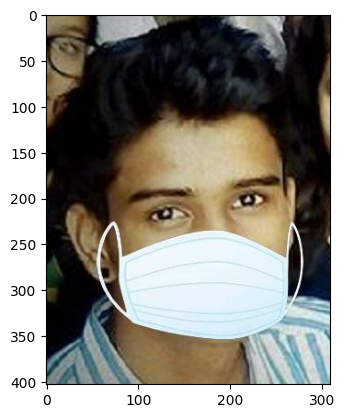

In [18]:
#displaying images
img = mpimg.imread('/content/data/with_mask/with_mask_1000.jpg')
imgplot = plt.imshow(img)
plt.show()

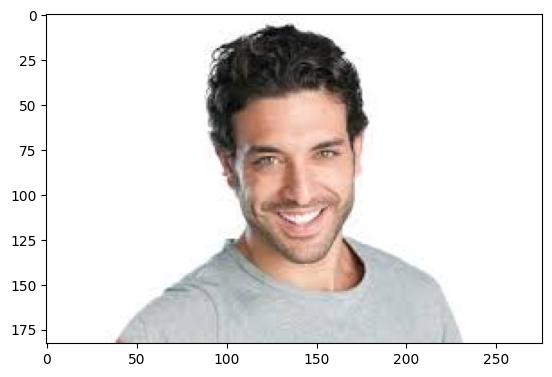

In [19]:
img = mpimg.imread('/content/data/without_mask/without_mask_1000.jpg')
imgplot = plt.imshow(img)
plt.show()

In [21]:
#convet the image t0 numpy

with_mask_path = '/content/data/with_mask/'
data = []
for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)
without_mask_path = '/content/data/without_mask/'
for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [22]:
type(data)

list

In [23]:
len(data)

7553

array([[[189, 182, 174],
        [190, 183, 175],
        [190, 183, 175],
        ...,
        [175, 171, 162],
        [173, 169, 160],
        [170, 166, 157]],

       [[190, 183, 175],
        [190, 183, 175],
        [190, 183, 175],
        ...,
        [174, 170, 161],
        [173, 169, 160],
        [171, 167, 158]],

       [[191, 184, 176],
        [191, 184, 176],
        [192, 185, 177],
        ...,
        [174, 170, 161],
        [173, 169, 160],
        [172, 168, 159]],

       ...,

       [[ 84,  96, 107],
        [ 69,  80,  94],
        [ 61,  76,  92],
        ...,
        [ 27,  36,  43],
        [ 23,  33,  37],
        [ 15,  25,  27]],

       [[ 69,  84,  98],
        [ 61,  75,  91],
        [ 52,  69,  85],
        ...,
        [ 25,  33,  39],
        [ 20,  29,  33],
        [ 12,  21,  24]],

       [[ 60,  77,  93],
        [ 54,  71,  87],
        [ 46,  63,  79],
        ...,
        [ 24,  31,  37],
        [ 19,  26,  31],
        [ 14,  22,  25]]], dtype=uint8)
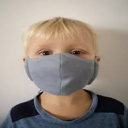

In [24]:
data[0]

In [25]:
data[0].shape

(128, 128, 3)

In [46]:
X = np.array(data)
Y = np.array(labels)

In [28]:
type(X)

numpy.ndarray

In [47]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,
                                                    random_state=2)

In [49]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [50]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [52]:
import tensorflow as tf
from tensorflow import keras

In [61]:
num_of_classes = 2
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation = 'relu',
                              input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation = 'sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [63]:
#compile the neural network
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [64]:
history = model.fit(X_train_scaled, Y_train, validation_split = 0.1, epochs = 5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 16s 49ms/step - accuracy: 0.6687 - loss: 0.8119 - val_accuracy: 0.8628 - val_loss: 0.3009
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.8652 - loss: 0.3188 - val_accuracy: 0.8793 - val_loss: 0.2717
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8950 - loss: 0.2705 - val_accuracy: 0.8777 - val_loss: 0.2386
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9110 - loss: 0.2166 - val_accuracy: 0.9008 - val_loss: 0.2613
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9327 - loss: 0.1789 - val_accuracy: 0.9157 - val_loss: 0.2058


In [65]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9295 - loss: 0.2011
Test Accuracy = 0.9285241365432739


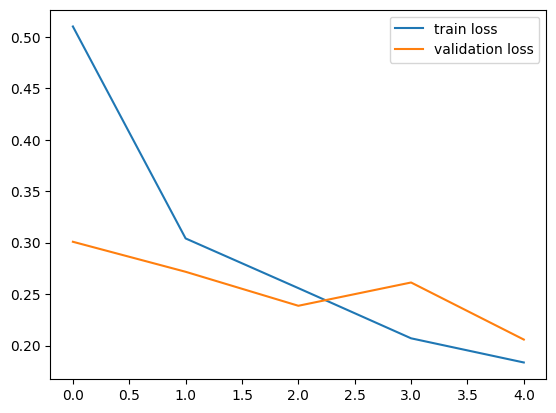

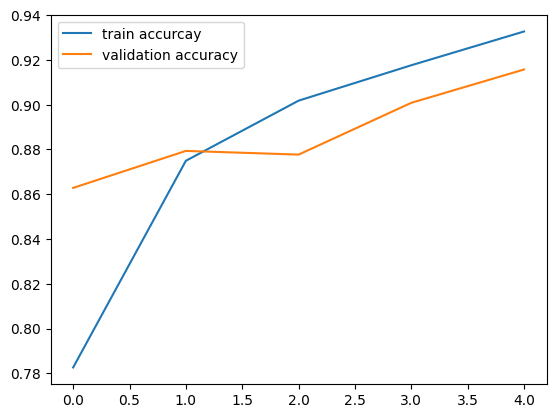

In [66]:
#plot the loss value and accuracy value
h = history

plt.plot(h.history['loss'], label = 'train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

plt.plot(h.history['accuracy'], label='train accurcay')
plt.plot(h.history['val_accuracy'], label = 'validation accuracy')
plt.legend()
plt.show()

predictive system

Path of the image to be predicted: /content/istockphoto-1208637836-612x612.jpg


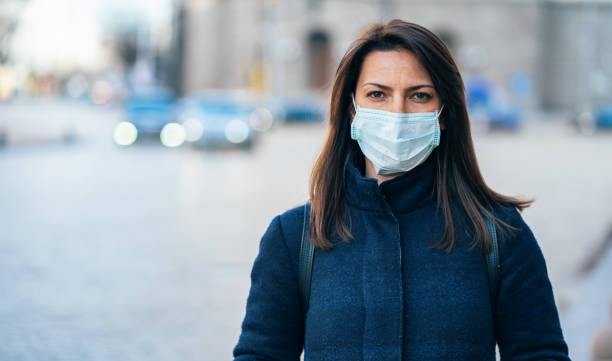

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 641ms/step
[[0.46016392 0.5576785 ]]
1
the person in the image is wearing a mask


In [69]:
input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resized = cv2.resize(input_image,(128,128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])
input_prediction = model.predict(input_image_reshaped)
print(input_prediction)

input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label == 1:
  print("the person in the image is wearing a mask")
else:
  print("the person in the picture is not wearing a mask")